<a href="https://colab.research.google.com/github/sharikha18/sharikha_Aiml-2052/blob/main/2203a52052AIML_LAB_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.datasets import fetch_openml
car_data=fetch_openml(name='car', version=2,parser='auto')

In [ ]:
type(car_data)

pandas.core.frame.DataFrame

In [ ]:
car_data.feature_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

In [ ]:
car_data=car_data.frame
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
0,vhigh,vhigh,2,2,small,low,P
1,vhigh,vhigh,2,2,small,med,P
2,vhigh,vhigh,2,2,small,high,P
3,vhigh,vhigh,2,2,med,low,P
4,vhigh,vhigh,2,2,med,med,P


In [ ]:
from sklearn.model_selection import train_test_split
train_data,test_data=train_test_split(car_data,test_size=0.3,random_state=20)
print('the size of training data is :{} \n the size of testing data is:{}'.format(len(train_data),len(test_data)))

the size of training data is :1209 
 the size of testing data is:519


In [ ]:
train_data.describe()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
count,1209,1209,1209,1209,1209,1209,1209
unique,4,4,4,3,3,3,2
top,med,high,5more,more,big,med,P
freq,327,311,319,418,411,406,849


In [ ]:
train_data['buying'].value_counts()

buying
med      327
high     307
vhigh    291
low      284
Name: count, dtype: int64

In [ ]:
train_data['maint'].value_counts()

maint
high     311
med      311
vhigh    294
low      293
Name: count, dtype: int64

In [ ]:
train_data['doors'].value_counts()

doors
5more    319
2        312
4        296
3        282
Name: count, dtype: int64

In [ ]:
train_data['persons'].value_counts()

persons
more    418
2       407
4       384
Name: count, dtype: int64

<Axes: xlabel='buying', ylabel='count'>

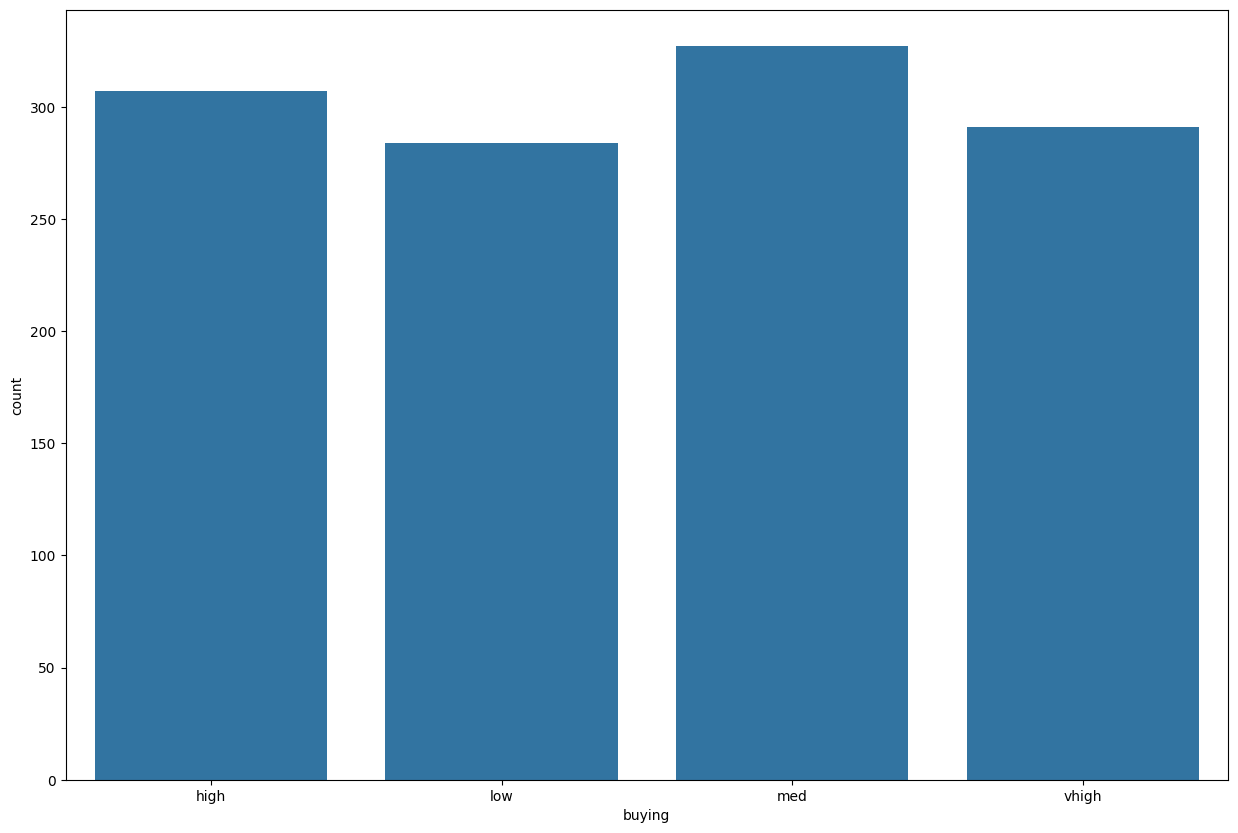

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data,x='buying')

<Axes: xlabel='maint', ylabel='count'>

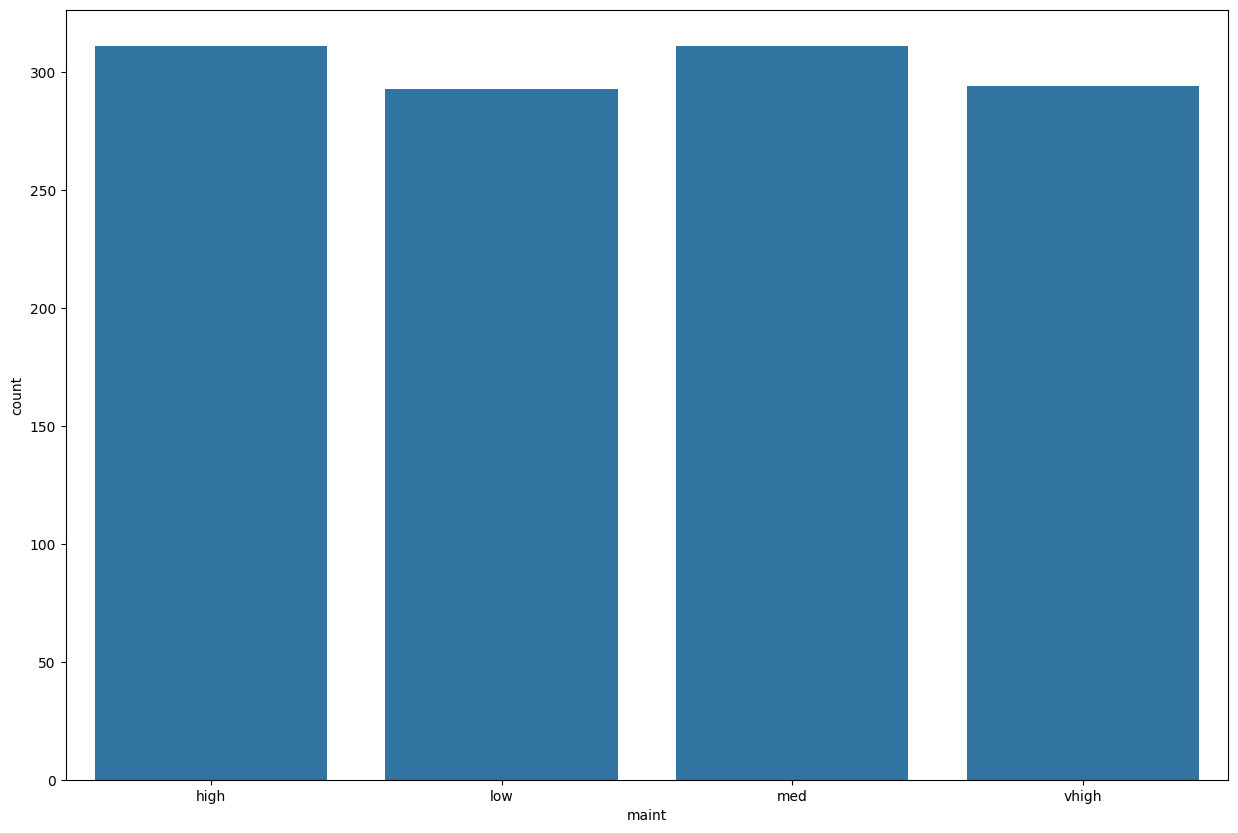

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data,x='maint')

<Axes: xlabel='doors', ylabel='count'>

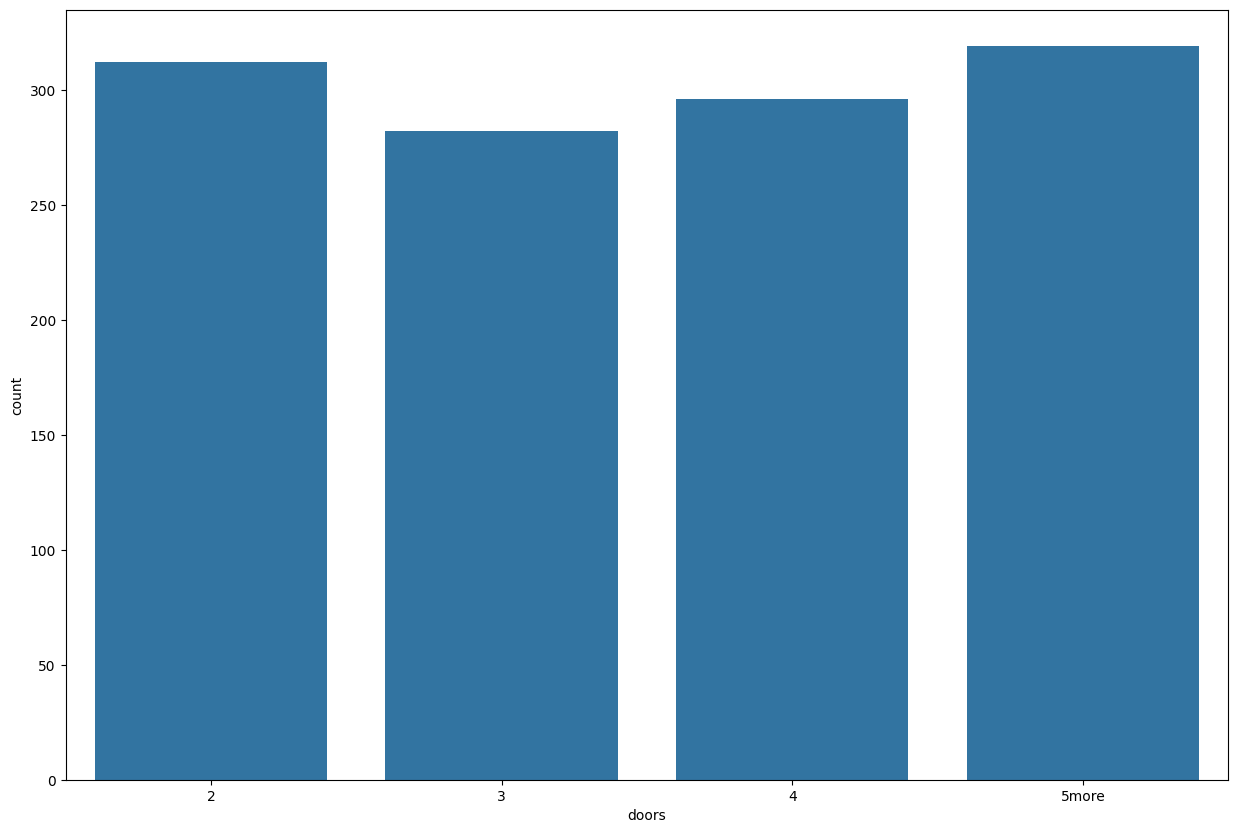

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data,x='doors')

<Axes: xlabel='persons', ylabel='count'>

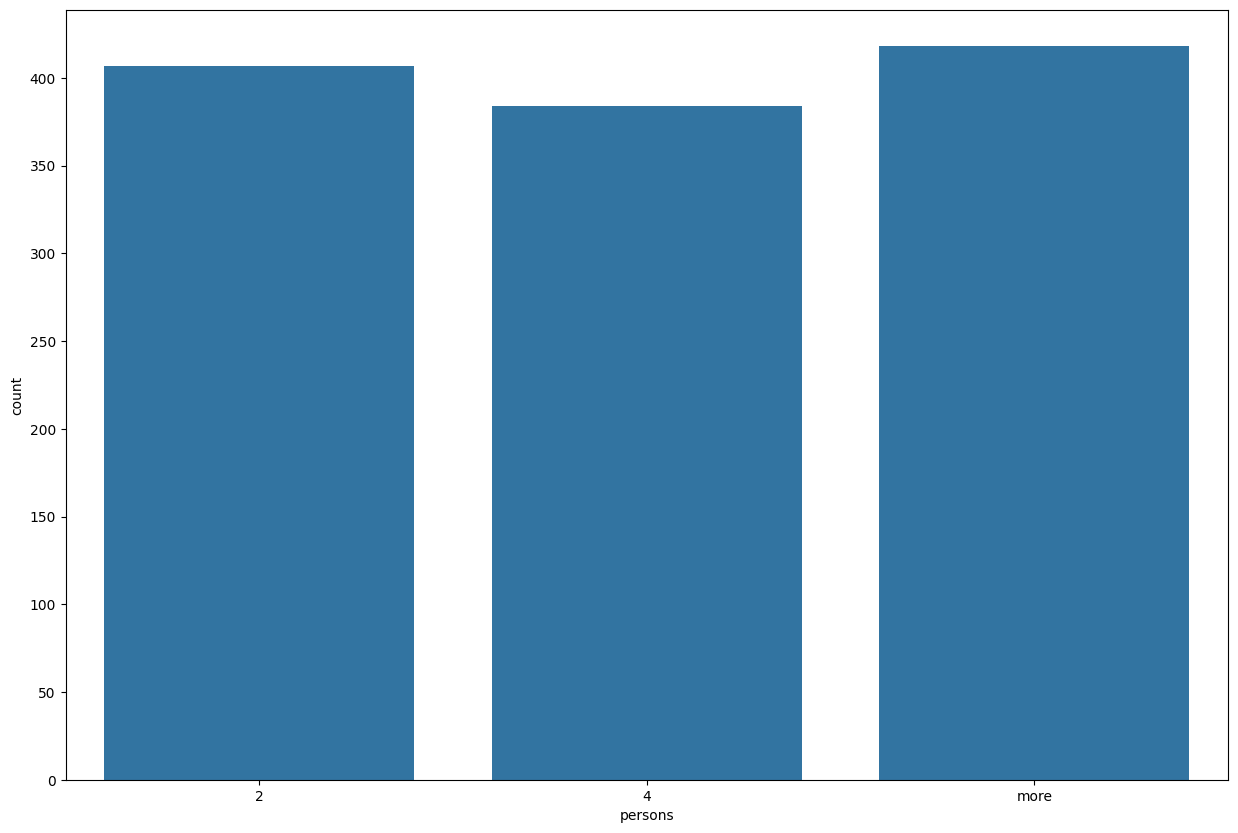

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data,x='persons')

<Axes: xlabel='buying', ylabel='count'>

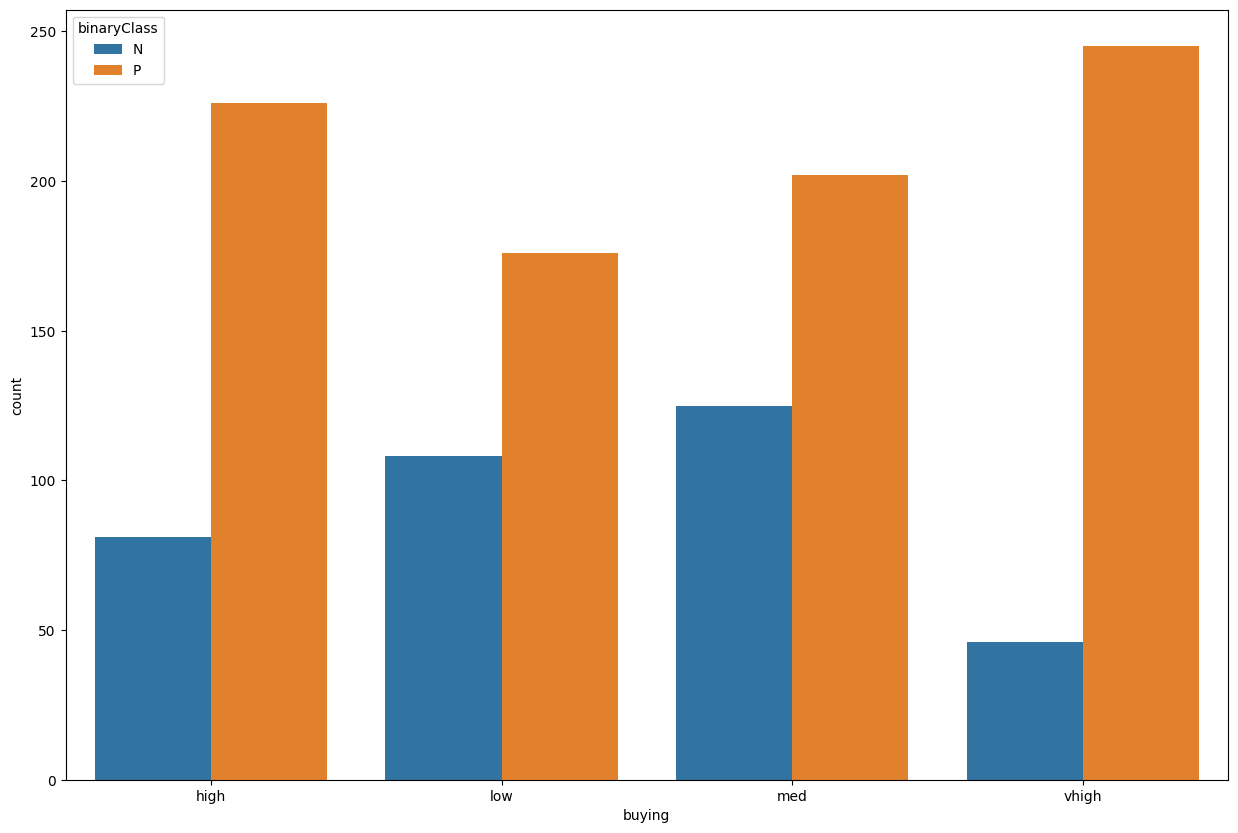

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data,x='buying',hue='binaryClass')

In [ ]:
car_train=train_data.drop('binaryClass',axis=1)
car_labels=train_data[['binaryClass']]

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
pipe=Pipeline([('ord_enc',OrdinalEncoder())])
car_train_prepared=pipe.fit_transform(car_train)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_enc=LabelEncoder()
car_labels_prepared=label_enc.fit_transform(car_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_clf=DecisionTreeClassifier()
tree_clf.fit(car_train_prepared,car_labels_prepared)

DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import accuracy_score
def accuracy(input_data,model,labels):
  preds=model.predict(input_data)
  acc=accuracy_score(labels,preds)
  return acc

In [ ]:
def conf_matrix(input_data,model,labels):
  preds=model.predict(input_data)
  cm=confusion_matrix(labels,preds)
  return cm

In [ ]:
accuracy(car_train_prepared,tree_clf,car_labels_prepared)

1.0

In [ ]:
conf_matrix(car_train_prepared,tree_clf,car_labels_prepared)

NameError: name 'confusion_matrix' is not defined

In [ ]:
conf_matrix(car_train_prepared,tree_clf,car_labels_prepared)

NameError: name 'confusion_matrix' is not defined